# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import time
from scipy.stats import linregress
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# to track
city_tracker = 1
# set_tracker = 1

# lists for results
max_temp = []
humidity_list = []
cloudiness_results = []
wind_speed = []
cities_list = []
country_list =[]
latitude = []
longitude = []
date = []

print(f"Begin")

# for loop for query
for city in cities:
#     if (i % 50 == 0 and i >= 50):
#         city_tracker = 1
#         set_tracker += 1
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #cities_query 
    response = requests.get(url).json()
    #append to list
    try:
        max_temp.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_results.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
         #results
        print(f"Result # {city_tracker} | {city}")
        #next
        city_tracker += 1
    except: 
        print("Unable to locate city, next result")
        pass
print("End")

Begin
Result # 1 | albany
Result # 2 | punta arenas
Result # 3 | iguape
Unable to locate city, next result
Result # 4 | port hawkesbury
Result # 5 | lompoc
Result # 6 | ushuaia
Result # 7 | strazske
Result # 8 | dingle
Result # 9 | cabra
Result # 10 | barrow
Result # 11 | alofi
Result # 12 | atar
Result # 13 | hobart
Result # 14 | harper
Unable to locate city, next result
Result # 15 | licata
Unable to locate city, next result
Result # 16 | busselton
Result # 17 | ribeira grande
Result # 18 | kangaatsiaq
Result # 19 | provideniya
Result # 20 | atuona
Result # 21 | khani
Result # 22 | port hardy
Result # 23 | avarua
Result # 24 | jamestown
Result # 25 | dakar
Result # 26 | tambopata
Result # 27 | petropavlovsk-kamchatskiy
Unable to locate city, next result
Result # 28 | port alfred
Result # 29 | oranjemund
Unable to locate city, next result
Result # 30 | clyde river
Result # 31 | alice town
Result # 32 | bethel
Result # 33 | rikitea
Result # 34 | lagoa
Result # 35 | lodwar
Result # 36 |

Result # 302 | nome
Result # 303 | chuy
Result # 304 | westport
Result # 305 | belaya gora
Result # 306 | strezhevoy
Result # 307 | sola
Result # 308 | bima
Result # 309 | tinsukia
Result # 310 | asau
Result # 311 | viedma
Result # 312 | birao
Result # 313 | flin flon
Result # 314 | sabha
Result # 315 | udomlya
Result # 316 | leningradskiy
Result # 317 | san vicente
Result # 318 | japura
Result # 319 | bagdarin
Result # 320 | merauke
Result # 321 | amapa
Unable to locate city, next result
Result # 322 | galesong
Unable to locate city, next result
Result # 323 | basco
Result # 324 | kruisfontein
Result # 325 | krasnyy
Unable to locate city, next result
Result # 326 | manono
Result # 327 | sangar
Unable to locate city, next result
Result # 328 | naifaru
Result # 329 | santa helena
Unable to locate city, next result
Result # 330 | cockburn town
Result # 331 | hwange
Result # 332 | hualmay
Result # 333 | tazovskiy
Result # 334 | nabire
Unable to locate city, next result
Result # 335 | mpon

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#dictionary
Results = {
    "City": cities_list,
    "Country": country_list,
    "Latitude": latitude,
    "Longitude": longitude,
    "Date": date,
    "Cloudiness": cloudiness_results,
    "Humidity": humidity_list,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_api_df = pd.DataFrame(Results)
weather_api_df.count()

City          574
Country       574
Latitude      574
Longitude     574
Date          574
Cloudiness    574
Humidity      574
Max Temp      574
Wind Speed    574
dtype: int64

In [5]:
weather_api_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Albany,US,42.60,-73.97,1594662006,16,43,86.00,2.06
1,Punta Arenas,CL,-53.15,-70.92,1594661970,90,84,33.80,6.93
2,Iguape,BR,-24.71,-47.56,1594662006,51,80,71.01,6.02
3,Port Hawkesbury,CA,45.62,-61.35,1594662007,1,61,84.99,11.41
4,Lompoc,US,34.64,-120.46,1594661960,3,82,62.01,3.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_api_df.describe()

,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
count,574.000000,574.000000,5.740000e+02,574.000000,574.000000,574.000000,574.000000
mean,19.371916,16.595575,1.594662e+09,48.381533,67.505226,70.042247,8.244826
std,33.642314,90.807556,7.890970e+01,35.955505,20.246624,14.908054,5.491703
min,-54.800000,-179.170000,1.594661e+09,0.000000,7.000000,33.800000,0.540000
25%,-7.712500,-63.427500,1.594662e+09,15.000000,55.000000,57.212500,4.215000
50%,22.245000,22.110000,1.594662e+09,43.000000,72.000000,72.015000,6.930000
75%,47.625000,95.360000,1.594662e+09,82.000000,82.000000,81.182500,11.245000
max,78.220000,179.320000,1.594662e+09,100.000000,100.000000,107.940000,33.690000


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

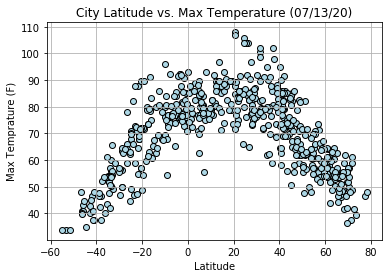

In [9]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Max Temp"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

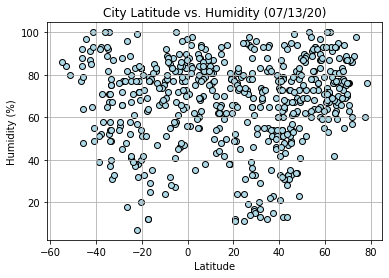

In [10]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Humidity"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

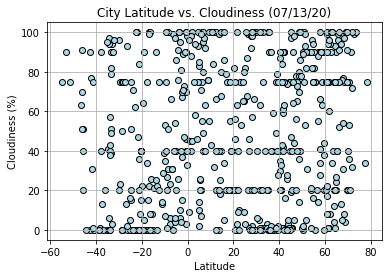

In [11]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Cloudiness"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

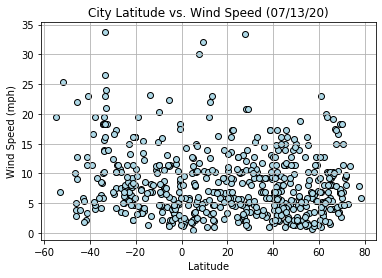

In [12]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Wind Speed"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_lat_df = weather_api_df.loc[weather_api_df["Latitude"] >= 0, :]
northern_lat_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Albany,US,42.60,-73.97,1594662006,16,43,86.00,2.06
3,Port Hawkesbury,CA,45.62,-61.35,1594662007,1,61,84.99,11.41
4,Lompoc,US,34.64,-120.46,1594661960,3,82,62.01,3.36
6,Strážske,SK,48.87,21.84,1594662007,14,55,63.00,13.87
7,Dingle,PH,11.00,122.67,1594662008,100,87,76.96,0.96


In [15]:
southern_lat_df = weather_api_df.loc[weather_api_df["Latitude"] < 0, :]
southern_lat_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
1,Punta Arenas,CL,-53.15,-70.92,1594661970,90,84,33.80,6.93
2,Iguape,BR,-24.71,-47.56,1594662006,51,80,71.01,6.02
5,Ushuaia,AR,-54.80,-68.30,1594661931,75,86,33.80,19.46
10,Alofi,NU,-19.06,-169.92,1594662008,90,73,71.60,19.46
12,Hobart,AU,-42.88,147.33,1594661952,90,87,42.80,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.74
The r-squared is: 0.5414982319532345


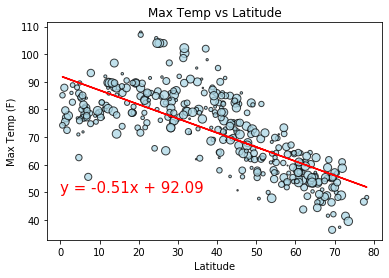

In [16]:
Latitude = northern_lat_df["Latitude"]
Max_Temp = northern_lat_df["Max Temp"]
correlation = st.pearsonr(Latitude, Max_Temp)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temp)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Max_Temp, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.85
The r-squared is: 0.7184796876912868


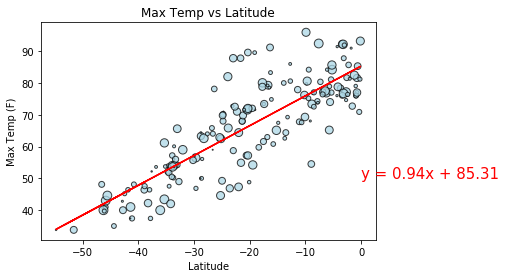

In [17]:
Latitude = southern_lat_df["Latitude"]
Max_Temp = southern_lat_df["Max Temp"]
correlation = st.pearsonr(Latitude, Max_Temp)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temp)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Max_Temp, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.11
The r-squared is: 0.011458713217989297


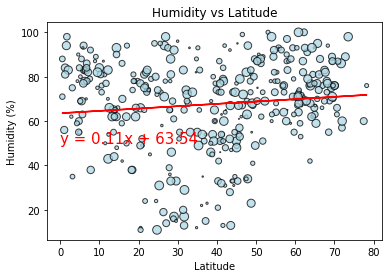

In [18]:
Latitude = northern_lat_df["Latitude"]
Humidity = northern_lat_df["Humidity"]
correlation = st.pearsonr(Latitude, Humidity)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Humidity, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.03
The r-squared is: 0.0011416729455930577


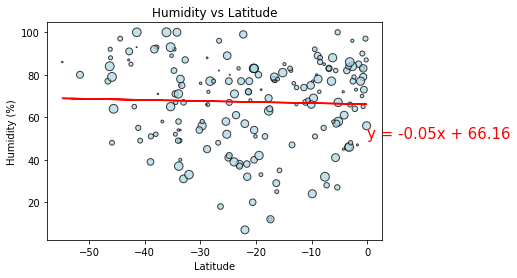

In [19]:
Latitude = southern_lat_df["Latitude"]
Humidity = southern_lat_df["Humidity"]
correlation = st.pearsonr(Latitude, Humidity)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Humidity, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.04
The r-squared is: 0.0017086510974355248


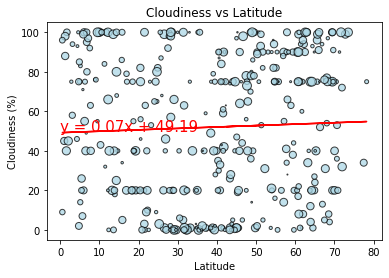

In [20]:
Latitude = northern_lat_df["Latitude"]
Cloudiness = northern_lat_df["Cloudiness"]
correlation = st.pearsonr(Latitude, Cloudiness)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Cloudiness, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.07
The r-squared is: 0.004773054919772034


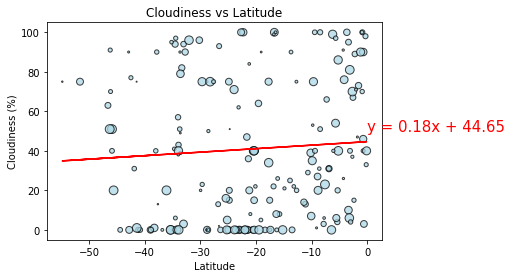

In [21]:
Latitude = southern_lat_df["Latitude"]
Cloudiness = southern_lat_df["Cloudiness"]
correlation = st.pearsonr(Latitude, Cloudiness)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Cloudiness, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.0
The r-squared is: 2.3782375356730903e-06


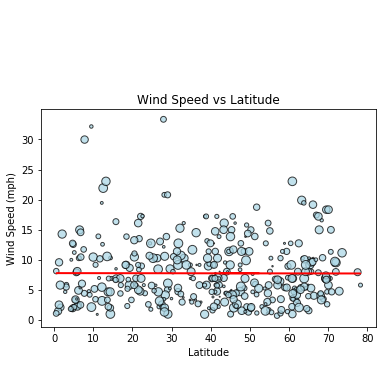

In [22]:
Latitude = northern_lat_df["Latitude"]
Wind_Speed = northern_lat_df["Wind Speed"]
correlation = st.pearsonr(Latitude, Wind_Speed)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Wind_Speed, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.29
The r-squared is: 0.08645356424855632


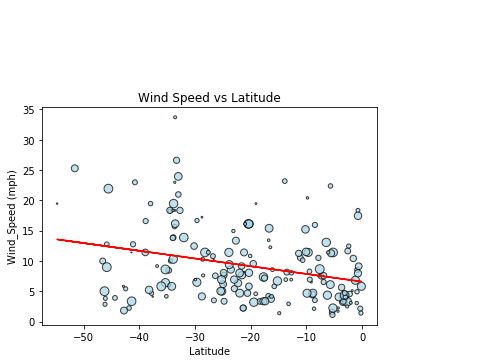

In [23]:
Latitude = southern_lat_df["Latitude"]
Wind_Speed = southern_lat_df["Wind Speed"]
correlation = st.pearsonr(Latitude, Wind_Speed)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Wind_Speed, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [26]:
weather_api_df.to_csv("Output/weather.csv", index=False, header=True)
#city_data = pd.read_csv("Output/weather.csv", encoding="utf-8")
# city_data = city_data.set_index("City")
# city_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Output/weather.csv'